# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import os
import json

In [2]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# We read tha data directly using pd.read_csv
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# we use the request library to fetch the data with the url
response = requests.get(url)

# Then, we create a file.tsv and we write in it the data collected in mode='wb' ( binary )
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
  
image_predictions_df = pd.read_csv("image_predictions.tsv", delimiter="\t")
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# We create a list to store the json data in the txt file 
tweets = []
# Here we read line by line the data, and store it in a list 
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

# We use json.loads to return an object so that we create a dataframe with it
jsondata=json.loads(json.dumps(tweets))
df = pd.DataFrame(jsondata)

# Then, we select only the needed columns 
tweet_json_df = df[['id','favorite_count','retweet_count']]
tweet_json_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
# We start by visually assessing the data
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# We use the tail methode to visually assess aswell
twitter_archive_df.tail()

# Visually, we can se that some dogs name are abnormale 'a', some even are missing 'None'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
# And Finally, we use sample to extract 5 samples at random to visually detect some quality issues
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
167,859851578198683649,NaN,NaN,2017-05-03 19:26:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859851578...,13,10,Trooper,None,None,None,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None
1536,689905486972461056,NaN,NaN,2016-01-20 20:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689905486...,11,10,Gizmo,None,None,pupper,None
970,750117059602808832,NaN,NaN,2016-07-05 00:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calvin. He just loves America so much....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750117059...,10,10,Calvin,None,None,None,None
1553,688908934925697024,NaN,NaN,2016-01-18 02:21:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688908934...,8,10,Clarence,None,None,None,None


In [9]:
# Now, we will use the info methode to check the column types 
twitter_archive_df.info()

# We can see that the tweet_id should be a string type because we wont be doing any integer manupilation on it
# Next, we can see that timestamp and retweeted_status_timestamp need to be datetime type to make it manipulation easy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Now we will use describe to check for numerical error
twitter_archive_df.describe()

# We can see that rating_denominator max value is 170 which is a quality error where it should be 10
# we can further check it out in the next code

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Here we see that our assessement is true 
twitter_archive_df.rating_denominator.value_counts()

# Where some of the rating_denominator values are different than 10 

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [12]:
#if we check out these denominators we see that there is some that are equal to 0, and others that are wierd like 130
twitter_archive_df[twitter_archive_df.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [13]:
#https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [14]:
# we can tell where the mistake is, the real rating should be 13/10 but in the dataset it's 960/00
print_full(twitter_archive_df[twitter_archive_df.rating_denominator == 0].text)

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


<ipython-input-13-9d2e693ebdf5>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [15]:
# So, we need to check for the other ratings with rating denominator > 10
print_full(twitter_archive_df[twitter_archive_df.rating_denominator != 10].text)

# As we can see, the real rating are not extracted from the text 
# And in some lines, there is no ratings

# Visually, we can see that also that some ratings are weird (line 1120) where the rating is an combinaison of ratings for different dogs or multiple dogs

# We can also see in the text that some of them start with RT, which is the retweets, potentially duplicates

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

<ipython-input-13-9d2e693ebdf5>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [16]:
# Now, we check duplicates
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

# We find that there is no duplicates

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
# If we check for retweets (RT) we find 183 instances
twitter_archive_df[twitter_archive_df.text.str.startswith('RT') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [18]:
# We check for the problem of name that we assessed visually
twitter_archive_df.name.value_counts()

# we notice that the irregular name 'a' is in lower case, perhaps the other abnormale names are aswell in lowercase so we check

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
# we notice that just as we suspected, the existence of abnormale/irregular name in this dataset 
twitter_archive_df[twitter_archive_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64


**Twitter_archive_df :**
 
 visual assessment:

1.   missing data in the column (expanded_urls)
2.   in the lines 2352, 2353, 2354 the name columns contains ( 'a' ) which i assume is an error, not a dog name + the existance of irregular name such as : 
['a', 'the', 'an', 'very', 'just', 'quite', 'one', 'getting', 'actually','mad', 'not', 'old', 'life', 'officially', 'light', 'by', 'infuriating','such', 'all', 'unacceptable', 'this', 'his', 'my', 'incredibly','space']
3.   some line dont have a classification (doggo, floofer, pupper, puppo) all are equal to None

programmatic assessment:

1.   tweet_id is integer (should be a string type), timestamp and retweeted_status_timestamp need to be datetime aswell
2.   some of the rating_denominator values are different than 10 
3.   some of the rating_numerator values are the composition of multiple ratings, some of them are not even ratings
4.   existing of retweets


---



In [20]:
# Now, we check the seconde datset
image_predictions_df.head()

# we can directly see that some values in the p1 columns are lowerCase where others are UpperCase, same for p2 and p3

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
# We check for data types
image_predictions_df.info()

# We notice that tweet_id needs to be String type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# We check if all the images are jpg's
image_predictions_df[~image_predictions_df.jpg_url.str.contains('jpg')].jpg_url

320    https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815    https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
Name: jpg_url, dtype: object

In [23]:
# And as we can see there is 2 lines where the images is png
image_predictions_df.iloc[320].jpg_url

# This is an inconsistency, but it doesn't affect our analysis 

'https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png'

In [24]:
# Now, we check duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

# We find that there is no duplicates

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
# We don't notice anything irregular in the describe results
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
# No missing data was found
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

**Image_predictions_df:**

this dataset is relativly clean. But : 

1.   some values in the p1 columns are lowerCase where others are UpperCase
2.   tweet_id is integer, needs to be String


---



In [27]:
# Now, for the last dataset 
tweet_json_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [28]:
# we check for data types
tweet_json_df.info()

# We notice that id need to be String type
#but it dont matter because we are going to merge this dataset with the twitter_archive_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
# No missing data found
tweet_json_df.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

In [30]:
# We will check the size of the dataset's

print("the dimentions of twitter_archive_df : " + str(twitter_archive_df.shape))
print("the dimentions of image_predictions_df : " + str(image_predictions_df.shape))
print("the dimentions of tweet_json_df : " + str(tweet_json_df.shape))

# we notice that the size of twitter_archive_df and tweet_json_df dont match (2 line are missing)

the dimentions of twitter_archive_df : (2356, 17)
the dimentions of image_predictions_df : (2075, 12)
the dimentions of tweet_json_df : (2354, 3)


**Tweet_json_df:**

assessment:

1.   missing lines (2 to be exact)



---





### Quality issues

1. existing of retweets in **text** column

2. in the lines 2352, 2353, 2354 the **name** columns contains ( 'a' ) is an error, not a dog name + the existance of irregular names such as:
['a', 'the', 'an', 'very', 'just', 'quite', 'one', 'getting', 'actually','mad', 'not', 'old', 'life', 'officially', 'light', 'by', 'infuriating','such', 'all', 'unacceptable', 'this', 'his', 'my', 'incredibly','space']

3.  **timestamp** and **retweeted_status_timestamp** need to be datetime 

4. **tweet_id** is integer (should be a string type)

5. some of the **rating_denominator** values are different than 10

6. some values in the **p1,p2,p3** columns are lowerCase where others are UpperCase

7. some of the **rating_numerator** values are the composition of multiple ratings, some of them are not even ratings
   
8. **Missing data** in the twitter_archive dataset in column (expanded_urls)

9. **tweet_id** is integer type, it needs to be a String

### Tidiness issues
1. Merge the tweet_json table and twitter_archive table and and image_predictions

2. the columns doggo, pupper, puppo, floofer need to be in one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_archive_clean_df = twitter_archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
tweet_json_clean_df = tweet_json_df.copy()

### Issue #1: 
existing of retweets in text column

#### Define:
We will just delete the retweets, because we don't need them in our analysis

#### Code

In [32]:
# we will select all the lines with the text not begining with 'RT'
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.text.str.startswith('RT') == False]

#### Test

In [33]:
# We check with the same intruction except we change he False to True
twitter_archive_clean_df[twitter_archive_clean_df.text.str.startswith('RT') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: 
in the lines 2352, 2353, 2354 the name columns contains ( 'a' ) is an error, not a dog name + irregular dog names:
['a', 'the', 'an', 'very', 'just', 'quite', 'one', 'getting', 'actually','mad', 'not', 'old', 'life', 'officially', 'light', 'by', 'infuriating','such', 'all', 'unacceptable', 'this', 'his', 'my', 'incredibly','space']

#### Define
The same thing with these dog names, we dont have the data to correct it, plus even if we have the data it is not worth correcting these error because of the low number of these occurences

#### Code

In [34]:
# We create a list with the abnormale names
abnormale_names = ['a', 'the', 'an', 'very', 'just', 'quite', 'one', 'getting', 'actually','mad', 'not', 'old', 'life', 'officially', 'light', 'by', 'infuriating','such', 'all', 'unacceptable', 'this', 'his', 'my', 'incredibly','space']
# Next, we take all data except the ones with the abnormal names
twitter_archive_clean_df = twitter_archive_clean_df[~twitter_archive_clean_df.name.isin(abnormale_names)]

#### Test

In [35]:
# We check by selecting the names with lowerCase
twitter_archive_clean_df[twitter_archive_clean_df.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:
timestamp and retweeted_status_timestamp need to be datetime

#### Define
We will change type to datetime using pd.to_datetime methode

#### Code

In [36]:
#We directly change the type using pd.to_datetime
twitter_archive_clean_df.timestamp = pd.to_datetime(twitter_archive_clean_df.timestamp)
twitter_archive_clean_df.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean_df.retweeted_status_timestamp)

#### Test

In [37]:
# We check by using the info() methode
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2069 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2069 non-null   datetime64[ns, UTC]
 4   source                      2069 non-null   object             
 5   text                        2069 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2011 non-null   object             
 10  rating_numerator            2069 non-null   int64           

### Issue #4:
tweet_id is integer (should be a string type)

#### Define
we change the tweet_id in both dataframes (twitter_archive_clean_df and image_predictions_clean_df) using the astype methode

#### Code

In [38]:
# We change the types with the astype methode
twitter_archive_clean_df.tweet_id = twitter_archive_clean_df.tweet_id.astype(str)
image_predictions_clean_df.tweet_id = image_predictions_clean_df.tweet_id.astype(str)

#### Test

In [39]:
# we check using the info methode
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2069 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2069 non-null   datetime64[ns, UTC]
 4   source                      2069 non-null   object             
 5   text                        2069 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2011 non-null   object             
 10  rating_numerator            2069 non-null   int64           

In [40]:
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5:
some of the rating_denominator values are different than 10

#### Define
seeing that there isn't a lot of mistakes regarding the rating_denominators we can just drop them

#### Code

In [41]:
# We take the data with th denominator == 10
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.rating_denominator == 10]

#### Test

In [42]:
# here we check
twitter_archive_clean_df[twitter_archive_clean_df.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6:
some values in the p1,p2,p3 columns are lowerCase where others are UpperCase

#### Define
We can use the map function to change the text to lowerCase in the p1,p2,p3 columns using str.lower methode

#### Code

In [43]:
# by the help of map methode, we change the text in p1,p2,p3 columns to lowerCase
image_predictions_clean_df.p1 = image_predictions_clean_df.p1.map(str.lower)
image_predictions_clean_df.p2 = image_predictions_clean_df.p2.map(str.lower)
image_predictions_clean_df.p3 = image_predictions_clean_df.p3.map(str.lower)

#### Test

In [44]:
# Here, we check
image_predictions_clean_df[image_predictions_clean_df.p1.str.isupper()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
image_predictions_clean_df[image_predictions_clean_df.p2.str.isupper()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [46]:
image_predictions_clean_df[image_predictions_clean_df.p3.str.isupper()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #7:
some of the rating_numerator values are the composition of multiple ratings, some of them are not even ratings

#### Define
if the rating_numerator's length is superior to 4 we just put it as Nan.
the rest should be correct even if the rating is 666/10 because as we saw in the assessment section their is some wierd values

#### Code

In [47]:
import numpy as  np
# Using the apply methode and lambda function we apply the changes to rating numerators
twitter_archive_clean_df.rating_numerator = twitter_archive_clean_df.rating_numerator.apply(lambda x: x if len(str(x)) < 4 else np.NaN)

In [48]:
# Next, we drop the Nan values in the rating_numenator column
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.rating_numerator.notna()]
# And reset the type to int
twitter_archive_clean_df.rating_numerator = twitter_archive_clean_df.rating_numerator.astype('int')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [49]:
# We use the value_counts() methode to check
twitter_archive_clean_df.rating_numerator.value_counts()

12     484
10     418
11     409
13     300
9      141
8       91
7       47
14      39
5       35
6       30
3       18
4       12
1        7
2        7
0        2
420      2
75       1
27       1
182      1
666      1
17       1
26       1
15       1
Name: rating_numerator, dtype: int64

### Issue #8:
Missing data in the twitter_archive dataset in column (expanded_urls)

#### Define
We just drop the missing values with dropna

#### Code

In [50]:
#We just drop the missing data with dropna in the expanded_urls column
twitter_archive_clean_df.dropna(axis=0, subset=['expanded_urls'], inplace=True)

#### Test

In [51]:
# We then check
twitter_archive_clean_df.expanded_urls.isna().sum()

0



---


### Tidiness:


---



### Issue #1:
Merge the tweet_json table and twitter_archive table and image_predictions

#### Define
we will use pd.merge to merge the two dataframes using inner join

#### Code

In [52]:
# First we change the id column type to string
tweet_json_clean_df.id = tweet_json_clean_df.id.astype(str)

In [53]:
# Next we merge the two table using pd.merge 
new_df = pd.merge(twitter_archive_clean_df, tweet_json_clean_df, how='inner', left_on='tweet_id', right_on='id')
new_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,892420643555336193,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,892177421306343426,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,891815181378084864,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,891689557279858688,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,891327558926688256,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None,666082916733198337,121,47
1991,666073100786774016,NaN,NaN,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None,666073100786774016,335,174
1992,666071193221509120,NaN,NaN,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None,666071193221509120,154,67
1993,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,666049248165822465,111,41


In [54]:
# Next we drop the id column
new_df.drop(['id'], axis=1, inplace=True)

In [55]:
# Now, we merge the last table with the datset
newer_df = pd.merge(new_df, image_predictions_clean_df, how='inner', left_on='tweet_id', right_on='tweet_id')
newer_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666082916...,...,1,pug,0.489814,True,bull_mastiff,0.404722,True,french_bulldog,0.048960,True
1875,666073100786774016,NaN,NaN,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666073100...,...,1,walker_hound,0.260857,True,english_foxhound,0.175382,True,ibizan_hound,0.097471,True
1876,666071193221509120,NaN,NaN,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666071193...,...,1,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True
1877,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Test

In [56]:
# Now, we check the columns and we seee that the merge were seccussful
newer_df.columns 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #2:
the columns doggo, pupper, puppo, floofer need to be in one column

#### Define
we will create one column 'dogtionary' containing the values doggo, floofer, puppo, pupper, and delete the 4four columns

#### Code

In [57]:
# firstly we replace the None, and Nan values with '' to make the transformation easier
newer_df.doggo.replace('None', '', inplace=True)
newer_df.doggo.replace(np.NaN, '', inplace=True)
newer_df.floofer.replace('None', '', inplace=True)
newer_df.floofer.replace(np.NaN, '', inplace=True)
newer_df.pupper.replace('None', '', inplace=True)
newer_df.pupper.replace(np.NaN, '', inplace=True)
newer_df.puppo.replace('None', '', inplace=True)
newer_df.puppo.replace(np.NaN, '', inplace=True)

In [58]:
# We add the values of the four columns into the new column
newer_df['dogtionary'] = newer_df.doggo + ',' + newer_df.floofer + ',' + newer_df.pupper + ',' + newer_df.puppo

In [59]:
# Then we drop the 4 columns 
newer_df.drop(['doggo',	'floofer',	'pupper',	'puppo'], axis=1, inplace=True)

#### Test

In [60]:
# We just take some samples and visually observe
newer_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
1497,674265582246694913,NaN,NaN,2015-12-08 16:33:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Henry. He's a shit dog. Short pointy e...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674265582...,...,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False,",,,"
755,743609206067040256,NaN,NaN,2016-06-17 01:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/743609206...,...,weimaraner,0.982794,True,american_staffordshire_terrier,0.004766,True,great_dane,0.003432,True,",,,"
1538,673343217010679808,NaN,NaN,2015-12-06 03:28:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673343217...,...,chihuahua,0.541408,True,italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True,",,,"
1337,679777920601223168,NaN,NaN,2015-12-23 21:37:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/679777920...,...,bloodhound,0.528819,True,bull_mastiff,0.420119,True,french_bulldog,0.009481,True,",,pupper,"
485,788412144018661376,NaN,NaN,2016-10-18 16:11:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/788412144...,...,golden_retriever,0.805238,True,labrador_retriever,0.113798,True,brittany_spaniel,0.038559,True,",,,"


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
newer_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
newer_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,",,,"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,",,,"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,",,,"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,",,,"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,",,,"


In [63]:
# We check the source of these tweets
newer_df.source.value_counts()

# we find that majourity of these tweets are from an iphone device

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1845
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       25
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [64]:
# Next we want to see the favorite dogs
newer_df.groupby('p1').favorite_count.sum().sort_values(ascending=False)

#we can see that the dog breedwith the favorite count is the golden_retriever

p1
golden_retriever      1638035
labrador_retriever    1093097
pembroke               954213
chihuahua              673876
samoyed                491651
                       ...   
piggy_bank                344
trombone                  323
hay                       258
crash_helmet              211
desktop_computer          108
Name: favorite_count, Length: 362, dtype: int64

In [65]:
# and lastly, we check the dogtionary for the favorite dogs
newer_df.groupby('dogtionary').favorite_count.sum().sort_values(ascending=False)

# we notice that majority of the dogs with the dogtionary terms are pupper's

dogtionary
,,,                13719616
,,pupper,           1384963
doggo,,,            1196581
,,,puppo             474806
doggo,,pupper,       102456
,floofer,,            92442
doggo,,,puppo         47844
doggo,floofer,,       17169
Name: favorite_count, dtype: int64

### Insights:
1. majourity of these tweets are from an iphone device

2. the dog breedwith the favorite count is the golden_retriever

3. majority of the dogs with the dogtionary terms are pupper's

### Visualization

Text(0, 0.5, 'count')

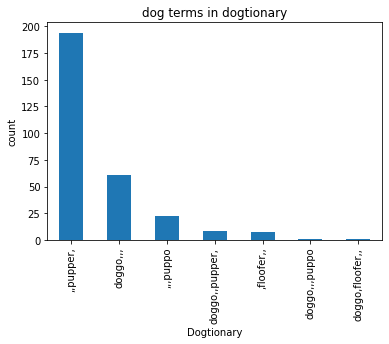

In [66]:
import matplotlib.pyplot as plt

newer_df.dogtionary.value_counts().sort_values(ascending=False)[1:].plot(kind='bar')
plt.title('dog terms in dogtionary')
plt.xlabel('Dogtionary')
plt.ylabel('count')